## Compare CO$_2$ HITRAN and HITEMP

⚠️ *HITEMP CO2 computations require a lot of RAM. If you're lucky to be hosted on a  https://notebooks.gesis.org binder with 8 GB RAM you should be fine. If on the others https://mybinder.org/ Binder providers with 2 GB RAM you may be at risk of crashing your Binder.* 

Compare the asymmetric stretching band  of CO2 (the 2400 cm-1 / 4.2 µm band), at various temperatures from 300 to 3500 K, in the HITRAN and HITEMP databases. If using these databases in your work, remember [to cite them](https://radis.readthedocs.io/en/latest/references/references.html#line-databases).

For any help, refer to [RADIS documentation](https://radis.readthedocs.io) 

---

First let's initialize our RADIS environment, and the calculation conditions : 

## Databases 

The HITRAN database will be automatically downloaded. The HITEMP database files for CO2 have been preconfigured in the RADIS [~/.radis](../.radis) config file. You can see the list of preconfigured databases with `printDatabankList`: 


In [1]:
from radis.misc.config import printDatabankList
printDatabankList()

Databanks in /home/jovyan/.radis:  HITEMP2019-CO,HITEMP2010-CO2


HITEMP2019-CO 
-------
info : HITEMP2019 CO lines with TIPS-2017 for partition functions (equilibrium) and RADIS for rovibrational energies (nonequilibrium)
path : ['/home/jovyan/databases/HITEMP/05_HITEMP2019_all.par']
format : hitran
parfuncfmt : hapi
levelsfmt : radis


HITEMP2010-CO2 
-------
info : HITEMP2020 CO2 lines with TIPS-2017 for partition functions (equilibrium) and RADIS for rovibrational energies (nonequilibrium)
path : ['/home/jovyan/databases/HITEMP/CO2/*.par']
format : hitran
parfuncfmt : hapi
levelsfmt : radis


### Calculations

Let's initialize the plot environment, and choose some conditions for all the calculations : 

In [2]:
# Setup plots : use `%matplotlib widget` for interactive plots (zoom, etc.) but graphs will not appear on download.
%matplotlib inline

from astropy import units as u
conditions = {"wavenum_min": 2000 / u.cm, 
              "wavenum_max": 2400 / u.cm,
              "molecule":'CO2',
              "isotope":'1,2,3',
              "pressure":1.01325 * u.bar,
              "mole_fraction":1,
              "path_length":1 * u.cm,
             }


Now let's calculate the spectra with [calc_spectrum](https://radis.readthedocs.io/en/latest/source/radis.lbl.calc.html#radis.lbl.calc.calc_spectrum) 

In [3]:
from radis import calc_spectrum
# CO2 HITRAN
s_tran = calc_spectrum(**conditions,
                       Tgas=300, 
                       databank='fetch',  # HITRAN automatically downloaded
                       name="HITRAN"
                      )
# without verbose=False this will show all the input parameters. 
# With verbose=2,3,etc... we get increasing number of details about the calculation. 

Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO2_1_1995.00_2405.01.h5
Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO2_2_1995.00_2405.01.h5
Using cache file: /home/jovyan/.astropy/cache/astroquery/Hitran/tempfile_CO2_3_1995.00_2405.01.h5
HAPI version: 1.1.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005
Calculating Equilibrium Spectrum
Physical Conditio

/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:241: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


Now let's compute with HITEMP. 

⚠️ *The first computation may take a lot of time to generate .hdf5 [cache files](https://radis.readthedocs.io/en/latest/source/radis.misc.cache_files.html) from the HITEMP files. At this point this is not yet done while setting up the databases. The spectrum calculation itself will be extremelly fast for the rest of your session !*

In [4]:
# CO2 HITEMP
s_temp = calc_spectrum(**conditions,
                       Tgas=300, 
                       databank='HITEMP2010-CO2',  # HITRAN automatically downloaded
                       name="HITEMP2019"
                      )

Using database: HITEMP2010-CO2
HITEMP2010-CO2 
-------
info : HITEMP2020 CO2 lines with TIPS-2017 for partition functions (equilibrium) and RADIS for rovibrational energies (nonequilibrium)
path : ['/home/jovyan/databases/HITEMP/CO2/*.par']
format : hitran
parfuncfmt : hapi
levelsfmt : radis


Database file /home/jovyan/databases/HITEMP/CO2/02_0-500_HITEMP2010.par < 1995.000000cm-1: irrelevant and rejected
Database file /home/jovyan/databases/HITEMP/CO2/02_4000-4500_HITEMP2010.par > 2405.010000cm-1: irrelevant and not loaded
Database file /home/jovyan/databases/HITEMP/CO2/02_4500-5000_HITEMP2010.par > 2405.010000cm-1: irrelevant and not loaded
Database file /home/jovyan/databases/HITEMP/CO2/02_3250-3500_HITEMP2010.par > 2405.010000cm-1: irrelevant and not loaded
Database file /home/jovyan/databases/HITEMP/CO2/02_3750-4000_HITEMP2010.par > 2405.010000cm-1: irrelevant and not loaded
Database file /home/jovyan/databases/HITEMP/CO2/02_6000-6500_HITEMP2010.par > 2405.010000cm-1: irrelevant 

/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:241: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


Plot the difference with [plot_diff](https://radis.readthedocs.io/en/latest/source/radis.spectrum.compare.html#radis.spectrum.compare.plot_diff)

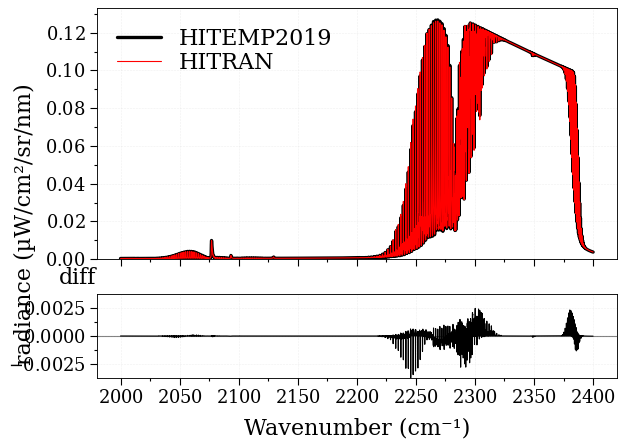

(<Figure size 640x480 with 2 Axes>,
 [<AxesSubplot:>, <AxesSubplot:xlabel='Wavenumber (cm⁻¹)'>])

In [5]:
from radis import plot_diff
plot_diff(s_temp, s_tran, Iunit='µW/cm2/sr/nm')

### Comparison for various temperatures 

Let's make a loop : 

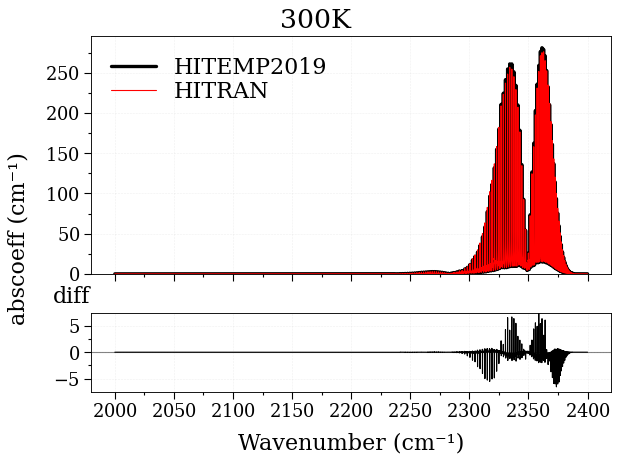

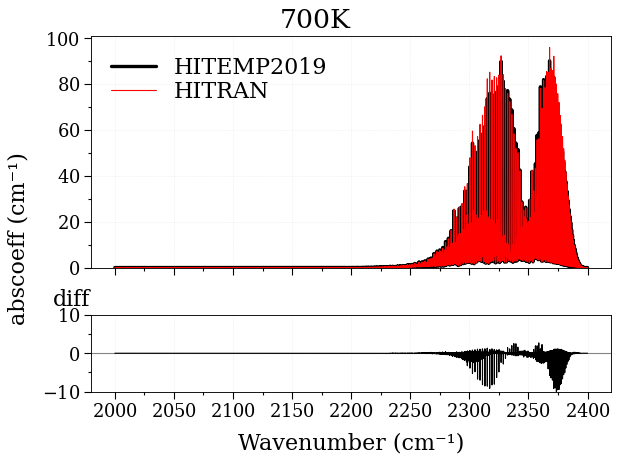

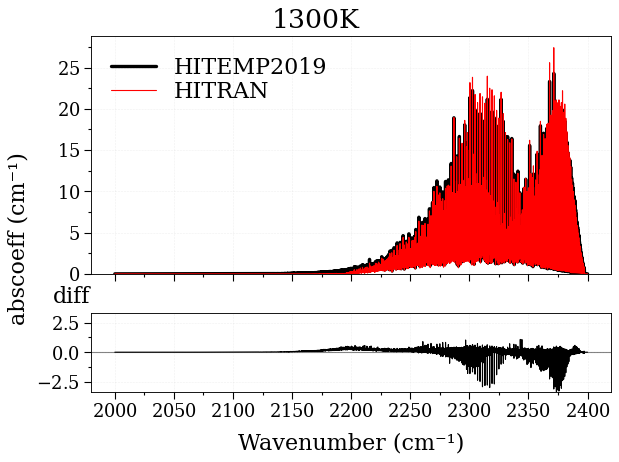

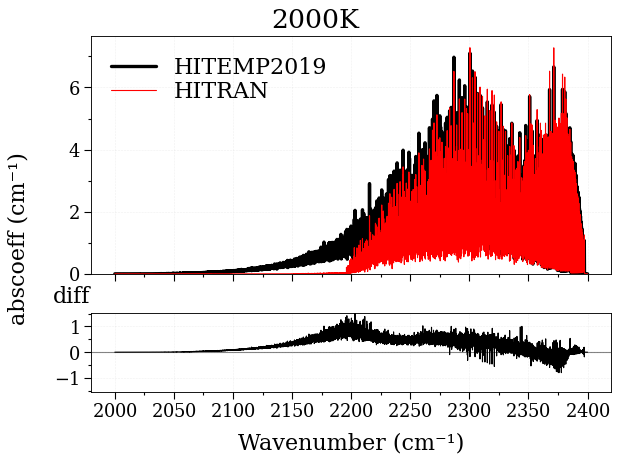

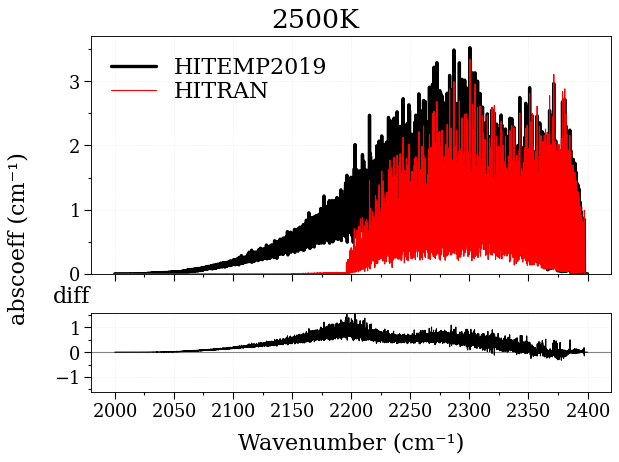

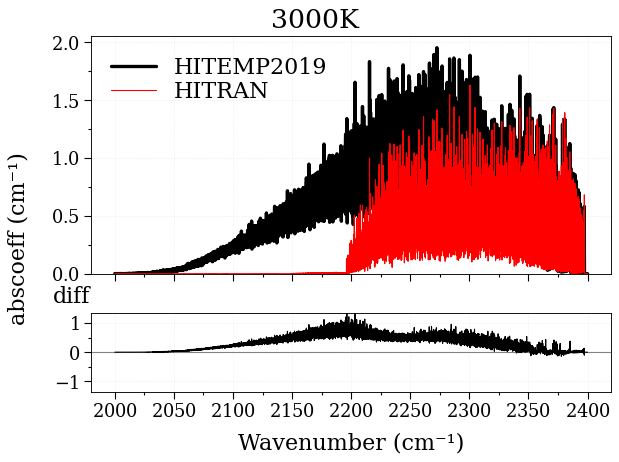

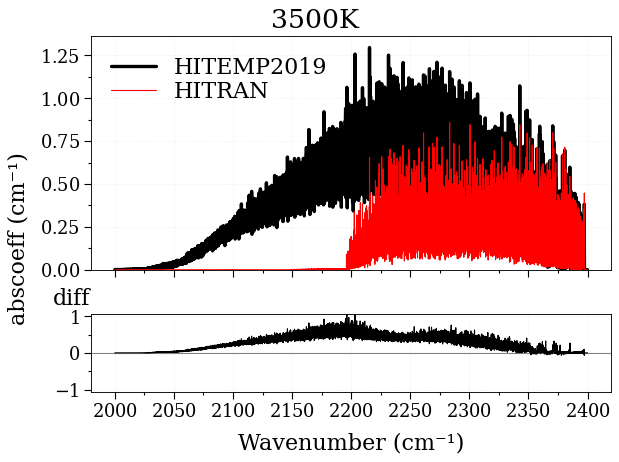

In [6]:
conditions.update({
    "warnings":{
            "MissingSelfBroadeningWarning": "ignore", # HITRAN has no temperature dependance for resonant-broadening
            "HighTemperatureWarning": "ignore", # HITRAN at high temperature is not valid and will trigger warnings. 
        },
    "verbose": False,  # no need to print calculation details 
})
    

for Tgas in [300, 700, 1300, 2000, 2500, 3000, 3500]:
    s_tran = calc_spectrum(**conditions,
                           Tgas=Tgas, 
                           databank='fetch',  # HITRAN automatically downloaded
                           name="HITRAN")
    s_temp = calc_spectrum(**conditions,
                           Tgas=Tgas, 
                           databank="HITEMP2010-CO2",
                           name="HITEMP2019")
    plot_diff(s_temp, s_tran, 'abscoeff', title=f"{Tgas}K")